# Make the logo displayed on the ``galpy`` website

In [1]:
import numpy
from galpy.potential import MWPotential2014
from galpy.orbit import Orbit
%pylab inline
import matplotlib.animation as animation
from IPython.display import HTML
_SAVE_IMGS= False

Populating the interactive namespace from numpy and matplotlib


Basic logo:

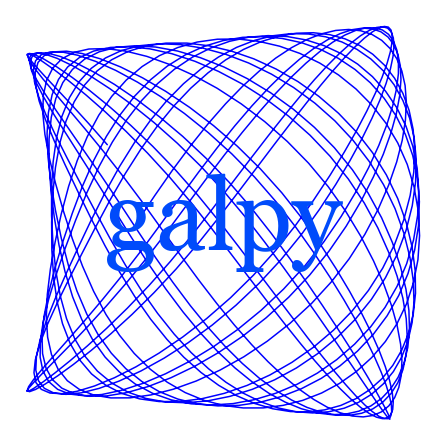

In [2]:
o= Orbit([1.,0.1,1.0,0.0,0.3])
ts= numpy.linspace(0.,90.,1001)
o.integrate(ts,MWPotential2014)
figsize(6,6)
# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
o.plot(color='b',gcf=True);
text(0.5*(left+right), 0.5*(bottom+top), 'galpy',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=100, color='#004BFB',fontname='Georgia',fontweight=1,
        transform=ax.transAxes)
axis('off');
xmin, xmax= gca().get_xlim()
ymin, ymax= gca().get_ylim()
if _SAVE_IMGS:
    savefig('galpy-logo.png',transparent=True)

Animate:

In [3]:
def init_anim_frame():
    line1= plot([],[])
    xlim(xmin,xmax)
    ylim(ymin,ymax)
    return (line1[0],)
figsize(6,6)
# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
axis('off');
fig.patch.set_facecolor('#FBFBF5')
tx= o.R(ts)
ty= o.z(ts)
line,= plot(tx[0],ty[0],color='#004BFB')
txt= text(0.5*(left+right), 0.5*(bottom+top), 'galpy',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=100, color='#004BFB',fontname='Georgia',fontweight=1,alpha=0.,
         transform=ax.transAxes)
subsamp= 7
def animate(ii):
    line.set_data(tx[:ii*subsamp],ty[:ii*subsamp])
    if False:
        txt.set_size(100*ii*subsamp/len(ts))
    else:
        if ii > len(ts)//subsamp//2:
            txt.update({'alpha': 2*(ii-len(ts)//subsamp//2)*subsamp/float(len(ts))})
        else:
            txt.update({'alpha': 0.})
    return (line,)
anim = animation.FuncAnimation(fig,animate,init_func=init_anim_frame,
                               frames=len(ts)//subsamp,interval=40,blit=True,repeat=False)
if _SAVE_IMGS:
    anim.save('galpy-logo.gif',writer='imagemagick',dpi=80,savefig_kwargs={'facecolor': '#FBFBF5'})
# The following is necessary to just get the movie, and not an additional initial frame
plt.close()
out= HTML(anim.to_html5_video())
plt.close()
out

This animation was then post-processed using the tools on [https://ezgif.com/](https://ezgif.com/) to (a) make it only do one loop, (b) compress, (c) I may have sped it up a bit more.

Note that in the above, saving a GIF with a transparent background does not seem to work (at least not with imagemagick), so the color of the background when saving is set to match the website's background color.